<a href="https://colab.research.google.com/github/PujaliBhaumik/Data_Analysis_model/blob/main/Gold_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/goldstock.csv')

# Print the DataFrame
print(df)

      Unnamed: 0        Date   Close    Volume    Open    High     Low
0              0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1              1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2              2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3              3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4              4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
...          ...         ...     ...       ...     ...     ...     ...
2506        2528  2014-01-28  1250.5   81426.0  1254.9  1261.9  1248.0
2507        2529  2014-01-27  1263.5   63419.0  1269.9  1280.1  1252.0
2508        2530  2014-01-24  1264.5   34998.0  1264.3  1273.2  1256.9
2509        2531  2014-01-23  1262.5   41697.0  1235.1  1267.1  1230.8
2510        2532  2014-01-22  1238.6   80262.0  1240.5  1243.5  1235.5

[2511 rows x 7 columns]


In [ ]:
# Check if all dates are in the same format
try:
  # Attempt to convert all dates to datetime format
  df['Date'] = pd.to_datetime(df['Date'])

  # If successful conversion, all dates are in the same format
  print("All dates are in the same format.")
except ValueError:
  # If conversion fails, some dates might be in a different format
  print("Some dates might be in a different format. Consider checking the 'Date' column.")

All dates are in the same format.


In [ ]:
# Check for null values in the entire DataFrame
if df.isnull().sum().any():
    print("Missing values found!")
else:
    print("No missing values found!")


No missing values found!


In [ ]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


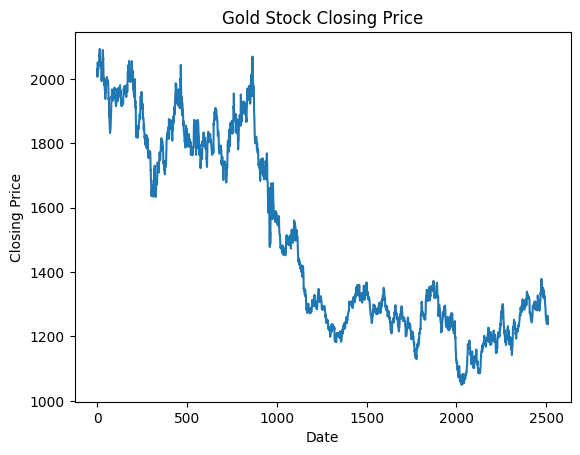

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Gold Stock Closing Price')
plt.show()


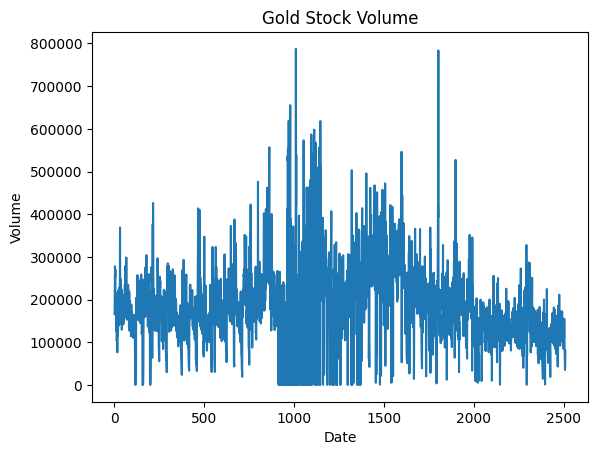

In [ ]:
import matplotlib.pyplot as plt
df['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Gold Stock Volume')
plt.show()


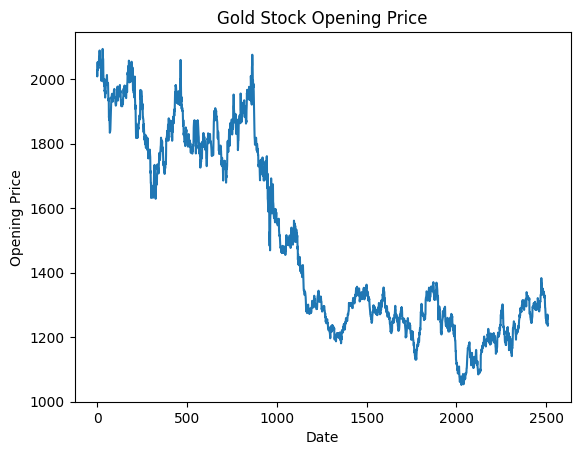

In [ ]:
import matplotlib.pyplot as plt
df['Open'].plot()
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Gold Stock Opening Price')
plt.show()


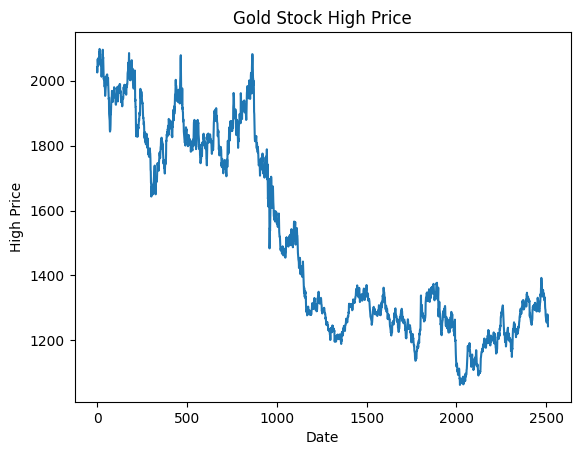

In [ ]:
import matplotlib.pyplot as plt
df['High'].plot()
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Gold Stock High Price')
plt.show()


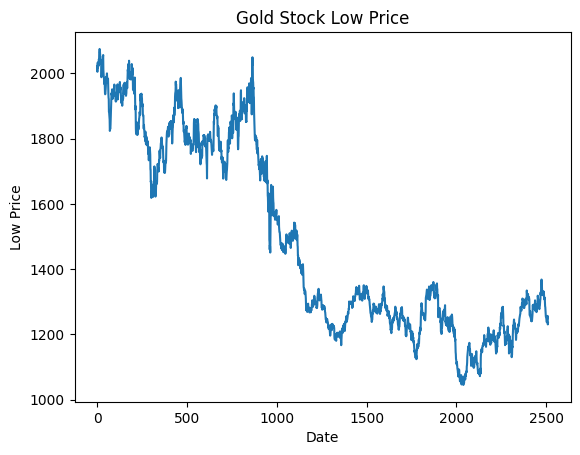

In [ ]:
import matplotlib.pyplot as plt
df['Low'].plot()
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Gold Stock Low Price')
plt.show()


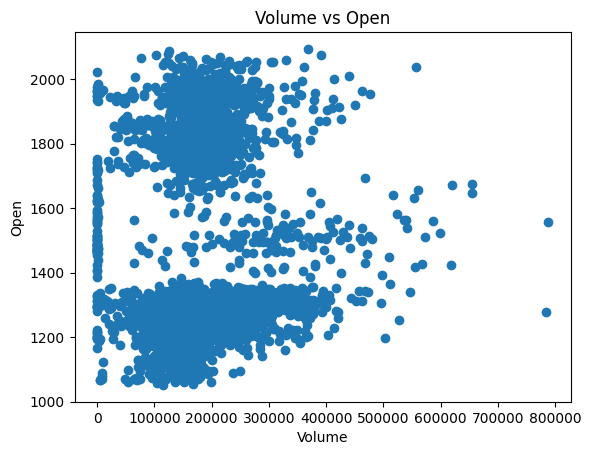

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Volume'], df['Open'])
plt.xlabel('Volume')
plt.ylabel('Open')
plt.title('Volume vs Open')
plt.show()


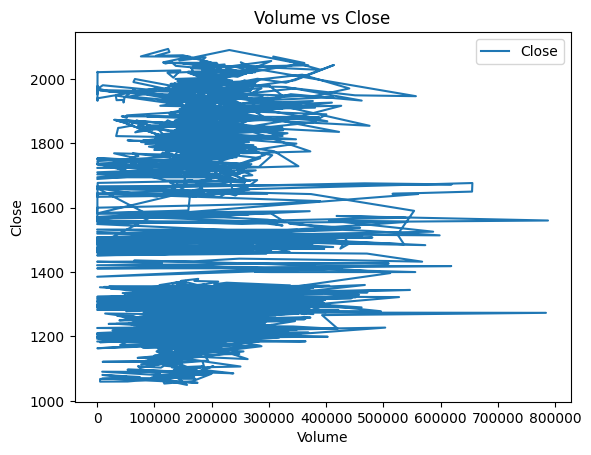

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Volume', y='Close')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Volume vs Close')
plt.show()

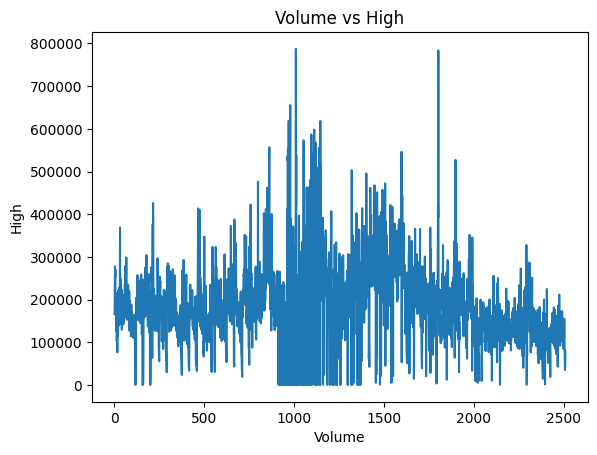

In [ ]:
import matplotlib.pyplot as plt
df['Volume'].plot(x='Volume', y='High')
plt.xlabel('Volume')
plt.ylabel('High')
plt.title('Volume vs High')
plt.show()


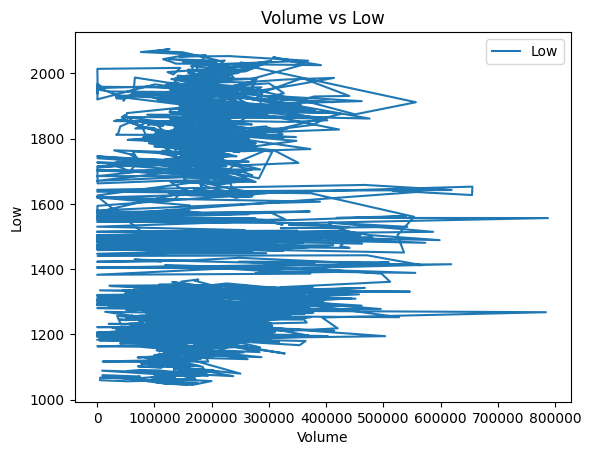

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Volume', y='Low')
plt.xlabel('Volume')
plt.ylabel('Low')
plt.title('Volume vs Low')
plt.show()


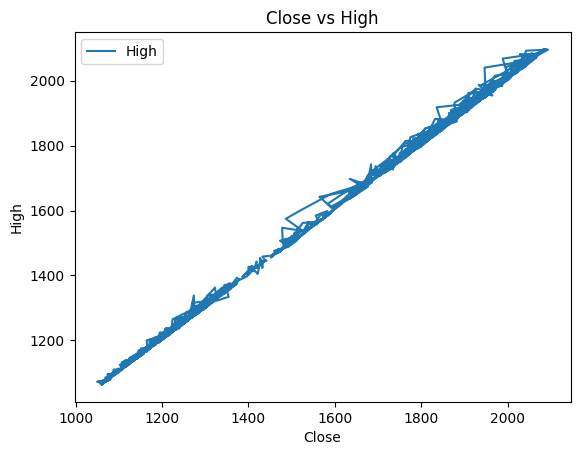

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Close', y='High')
plt.xlabel('Close')
plt.ylabel('High')
plt.title('Close vs High')
plt.show()


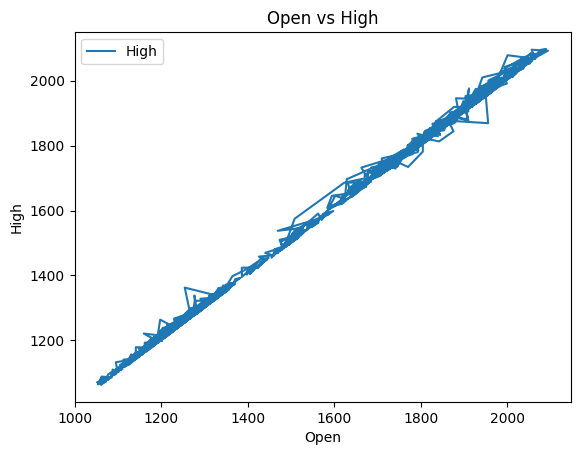

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Open', y='High')
plt.xlabel('Open')
plt.ylabel('High')
plt.title('Open vs High')
plt.show()


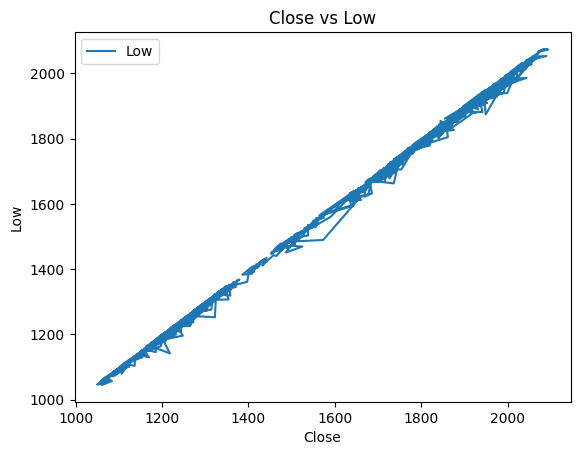

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Close', y='Low')
plt.xlabel('Close')
plt.ylabel('Low')
plt.title('Close vs Low')
plt.show()


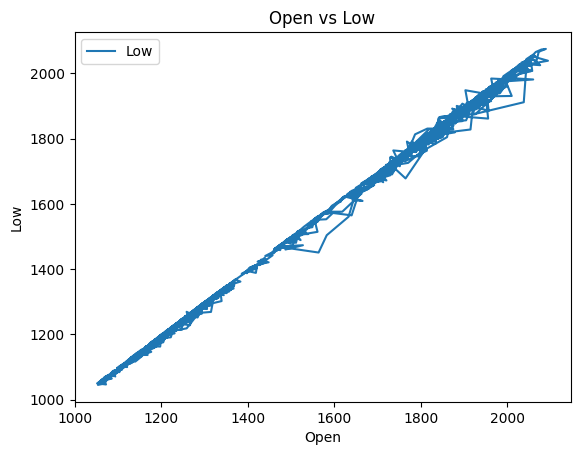

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Open', y='Low')
plt.xlabel('Open')
plt.ylabel('Low')
plt.title('Open vs Low')
plt.show()


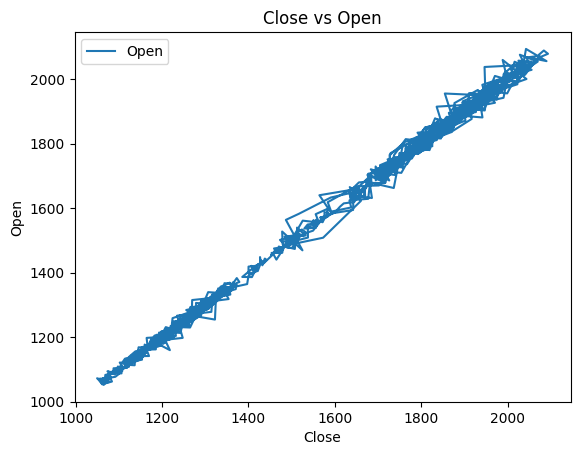

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Close', y='Open')
plt.xlabel('Close')
plt.ylabel('Open')
plt.title('Close vs Open')
plt.show()


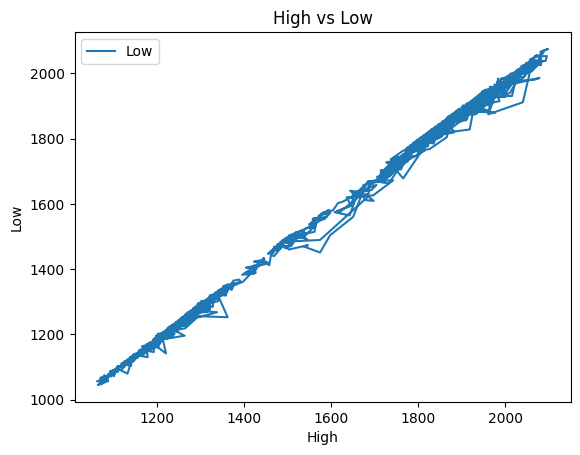

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='High', y='Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.title('High vs Low')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have the DataFrame 'df' with preprocessed data

# Split data into features (X) and target variable (y)
# Identify your target variable based on your analysis goal (e.g., closing price prediction)
X = df.drop('Date', axis=1)  # Assuming 'Date' is not a feature for your model
y = df['Close']  # Assuming you want to predict the closing price

# Split data into training and testing sets (common practice: 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shapes:")
print(f"- X_train: {X_train.shape}")
print(f"- y_train: {y_train.shape}")

print("Testing data shapes:")
print(f"- X_test: {X_test.shape}")
print(f"- y_test: {y_test.shape}")

Training data shapes:
- X_train: (2008, 6)
- y_train: (2008,)
Testing data shapes:
- X_test: (503, 6)
- y_test: (503,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the training and testing data split (X_train, X_test, y_train, y_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared: {r2:.4f}")


Linear Regression Model Performance:
- Mean Squared Error (MSE): 0.00
- R-squared: 1.0000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Mean Squared Error (MSE): 89136.03295345872
Mean Absolute Error (MAE): 276.79244004113224


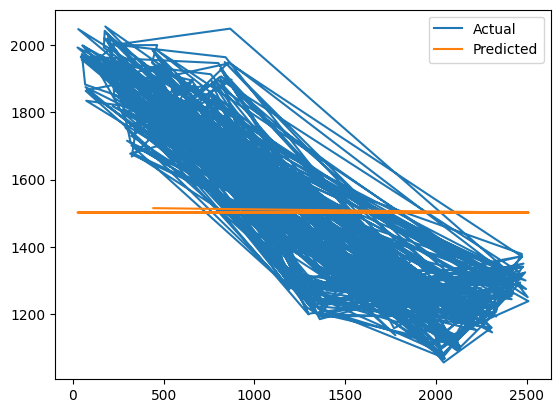

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have the training data (y_train) as a time series

# Identify the order of the ARIMA model (p, d, q) using techniques like ACF/PACF plots
# (this code snippet assumes you've already identified the order as (1, 1, 1))

# Create and train the ARIMA model
model = ARIMA(y_train, order=(1, 1, 1))  # Replace (1, 1, 1) with your identified order
model_fit = model.fit()

# Make predictions on the testing data
y_pred = model_fit.forecast(steps=len(y_test))  # Predict for the length of testing data

# Calculate efficiency metrics (common for time series forecasting)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the efficiency metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Optional: Plot actual vs predicted values for visual evaluation
import matplotlib.pyplot as plt

plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the training data X_train and y_train

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate efficiency metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the efficiency metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 0.7168347316103723
R-squared (R^2): 0.9999919289333936


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the training data X_train and y_train

# Create and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate efficiency metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the efficiency metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 4.414165994399229
R-squared (R^2): 0.9999502995234729


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the training data X_train and y_train

# Create and train the SVR model (Epsilon-SVR)
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate efficiency metrics (common for regression)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the efficiency metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 111256.43143161309
R-squared (R^2): -0.2526709837993526


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have the training data (X_train) as a Pandas DataFrame
# and the training target values (y_train)

# Define the LSTM model
model = Sequential()

# Reshape the training data to add the timestep dimension if necessary
if len(X_train.shape) == 2:
  # Option 1: Using X_train.values
  # X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

  # Option 2: Using X_train.to_numpy()
  X_train = X_train.to_numpy().reshape(X_train.shape[0], 1, X_train.shape[1])  # Add a timestep dimension

model.add(LSTM(50, return_sequences=True, activation='relu', input_shape=X_train.shape[1:]))  # Adjust parameters as needed
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # One output for predicted gold price

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# Make predictions on the testing data (reshape for LSTM input if necessary)
if len(X_test.shape) == 2:
  # Option 1: Using X_test.values
  # X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

  # Option 2: Using X_test.to_numpy()
  X_test = X_test.to_numpy().reshape(X_test.shape[0], 1, X_test.shape[1])

y_pred = model.predict(X_test)

# Calculate efficiency metrics (common for time series forecasting)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

# Print the efficiency metric
print("Mean Squared Error (MSE):", mse)


Epoch 1/100
63/63 [==============================] - 7s 6ms/step - loss: 1145248.0000
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 520621.6875
Epoch 3/100
63/63 [==============================] - 0s 6ms/step - loss: 429510.7500
Epoch 4/100
63/63 [==============================] - 0s 7ms/step - loss: 264480.5312
Epoch 5/100
63/63 [==============================] - 0s 7ms/step - loss: 155360.3438
Epoch 6/100
63/63 [==============================] - 0s 8ms/step - loss: 56226.2031
Epoch 7/100
63/63 [==============================] - 0s 6ms/step - loss: 11886.6787
Epoch 8/100
63/63 [==============================] - 0s 8ms/step - loss: 3758.6038
Epoch 9/100
63/63 [==============================] - 0s 7ms/step - loss: 2068.9956
Epoch 10/100
63/63 [==============================] - 0s 6ms/step - loss: 1401.7383
Epoch 11/100
63/63 [==============================] - 0s 7ms/step - loss: 1046.1918
Epoch 12/100
63/63 [==============================] - 0s 6ms/step - loss

In [ ]:
# Performance metrics dictionary
performance_metrics = {
    'Linear Regression': {'MSE': 0.0, 'R-squared': 1.0},
    'ARIMA': {'MSE': 89136.03295345872},
    'Random Forest': {'MSE': 0.7168347316103723, 'R-squared': 0.9999919289333936},
    'Gradient Boosting': {'MSE': 4.414165994399229, 'R-squared': 0.9999502995234729},
    'SVM': {'MSE': 111256.43143161309, 'R-squared': -0.2526709837993526},
    'LSTM': {'MSE': 118.98700783266928}
}

# Best model selection based on lowest MSE (ignoring Linear Regression due to potential overfitting)
best_model = min(performance_metrics, key=lambda x: performance_metrics[x]['MSE'] if x != 'Linear Regression' else float('inf'))

# Print the best performing model
print(f"Best Performing Model: {best_model}")


Best Performing Model: Random Forest


1/1 [==============================] - 0s 21ms/step


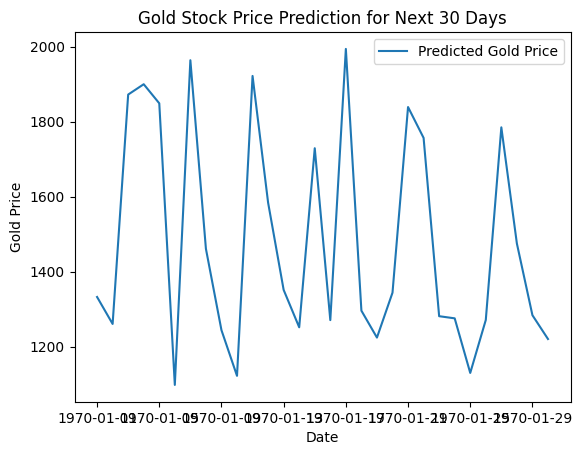

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for dataframe manipulation

# Assuming X_test is a NumPy array, extract the last 30 days of data
X_future = X_test[-30:]

# Make predictions for the next 30 days
y_pred_future = model.predict(X_future)

future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[:-1]
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': y_pred_future.flatten()}) # Flatten y_pred_future if it's 2D

# Plot the predicted values
plt.plot(future_df['Date'], future_df['Predicted_Price'], label='Predicted Gold Price')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Stock Price Prediction for Next 30 Days')
plt.legend()
plt.show()